# Case Study 1

Your case study is to build a linear regression model using L1 or L2 regularization (or both) the task to predict the Critical Temperature as closely as possible. In addition, include in your write-up which variable carries the most importance.

In [1]:
# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn libraries
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline

In [2]:
# Read in the data
unique = pd.read_csv('unique_m.csv')
train = pd.read_csv('train.csv')

# Drop critical temp since it exists in both data frames
unique = unique.drop(['critical_temp'], axis = 1)

# Merge unique and train
df = pd.concat([train, unique], axis = 1)

## Examine the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Columns: 169 entries, number_of_elements to material
dtypes: float64(156), int64(12), object(1)
memory usage: 27.4+ MB


In [4]:
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.3La1.7Cu1O4


In [5]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,0.061558,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,0.864859,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,45.000000,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0


Material isn't listed in `df.describe()`. How many unique values does it have?

In [6]:
len(df['material'].unique())

15542

Yikes, 15,542 unique strings. I'll drop this column from the data. 

In [7]:
df=df.drop(['material'], axis=1)

### Missing Values

In [8]:
df.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
Pb                       0
Bi                       0
Po                       0
At                       0
Rn                       0
Length: 168, dtype: int64

It doesn't appear that there are any missing values in the data. 

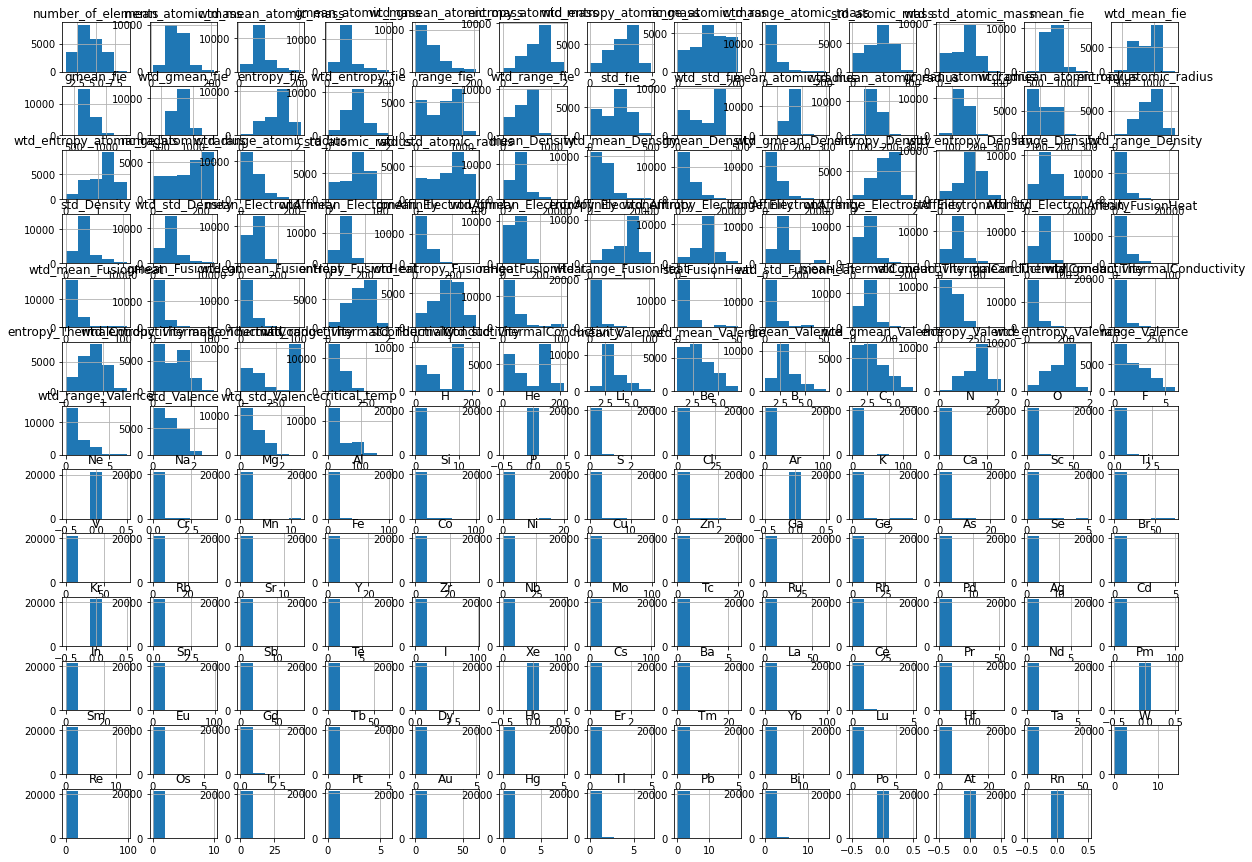

In [9]:
df.hist(bins=5, figsize=(20,15))
plt.show()

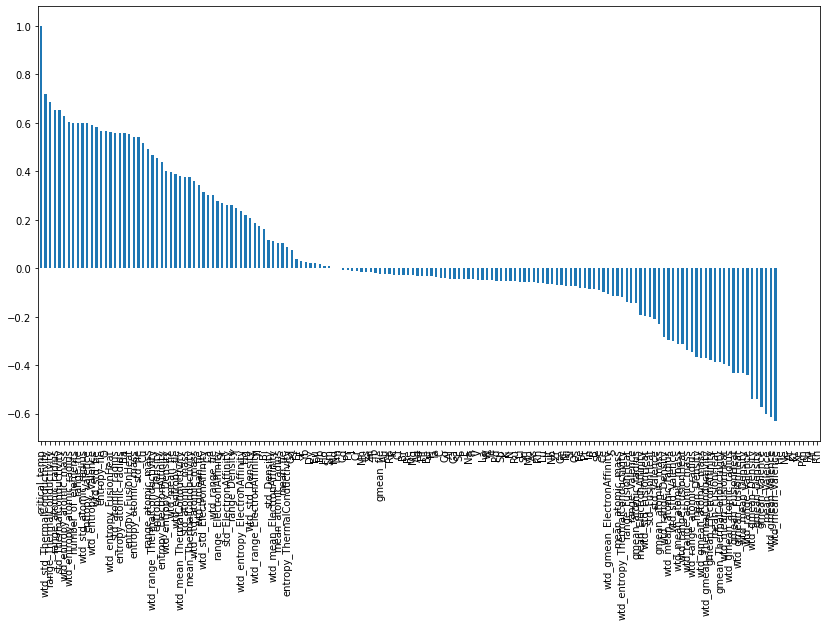

In [10]:
plt.figure(figsize=(14,8))
bars = df.corr()['critical_temp'].sort_values(ascending=False).plot(kind='bar')

### Examine Response Variable

Text(0.5, 1.0, 'Histogram of Critical Temp')

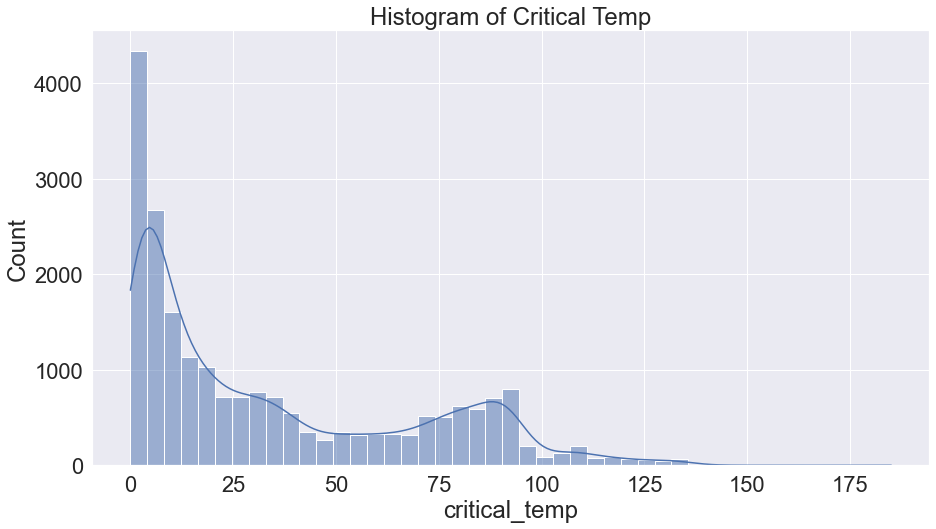

In [11]:
# Examine response variable
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 2)
p=sns.histplot(df['critical_temp'], kde=True)
p.set_title("Histogram of Critical Temp")

Text(0.5, 1.0, 'Histogram of Critical Temp\n(Log Transformed)')

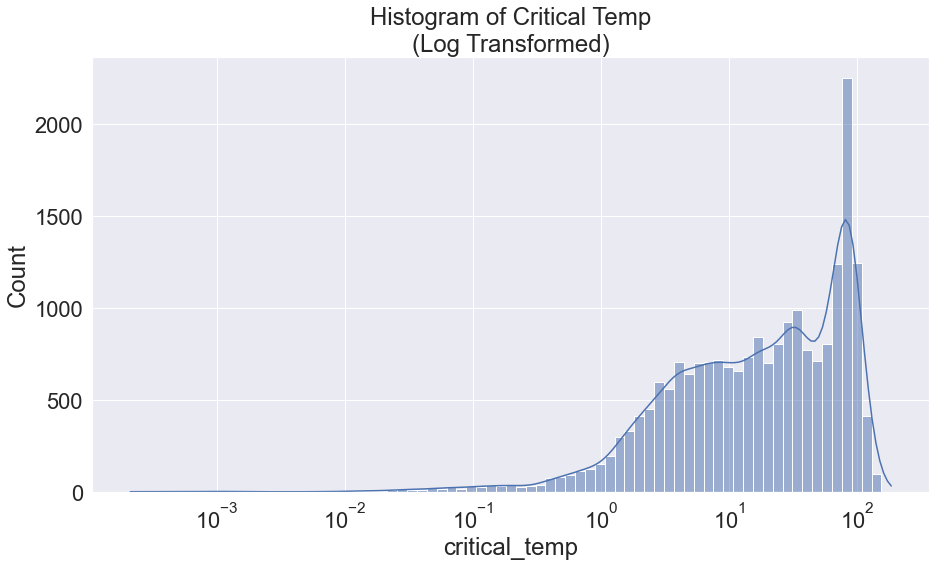

In [12]:
# Does a transformation help?
p=sns.histplot(df['critical_temp'], kde=True, log_scale=True)
p.set_title("Histogram of Critical Temp\n(Log Transformed)")

[Text(0.5, 0, '')]

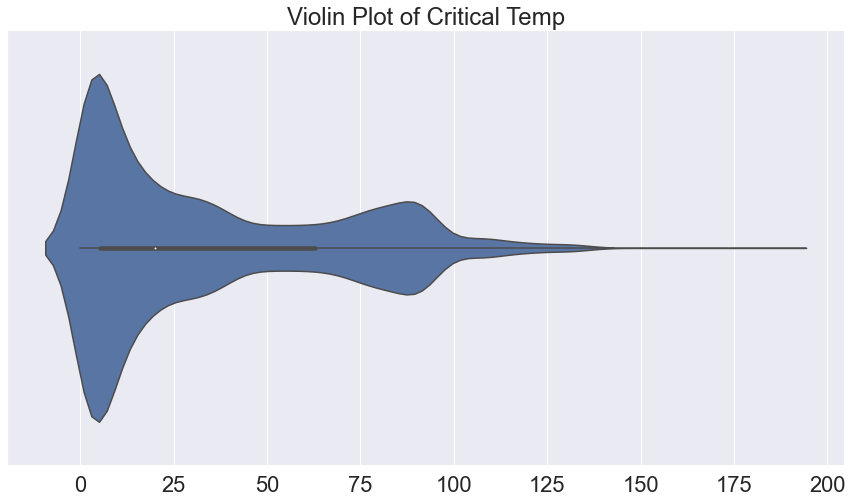

In [13]:
p=sns.violinplot(x=df['critical_temp'])
p.set_title("Violin Plot of Critical Temp")
p.set(xlabel=None)

## Model Building

### Define & Split the Data

In [14]:
# Define response & feature variables
X = df.drop(labels = ['critical_temp'], axis = 1)
y = df['critical_temp']

# Create a feature list
feature_list = list(X.columns)

# Split the data
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
    test_size=0.25,
    random_state=1)

### Instantiate Pipeline

In [15]:
# Source: https://towardsdatascience.com/pre-process-data-with-pipeline-to-prevent-data-leakage-during-cross-validation-e3442cca7fdc

lasso_pipeline = make_pipeline(RobustScaler(), Lasso(random_state=1))
ridge_pipeline = make_pipeline(RobustScaler(), Ridge(random_state=1))

# Set up alpha search
# https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline
alpha_range = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 3, 5, 7, 9, 10, 100, 10000, 10000]
lasso_params = [{'lasso__alpha': alpha_range}]
ridge_params = [{'ridge__alpha': alpha_range}]

### Train Models

#### LASSO

In [16]:
lasso_train = GridSearchCV(estimator=lasso_pipeline, 
                           param_grid=lasso_params, 
                           scoring='neg_mean_absolute_error', 
                           cv=10, 
                           n_jobs=-1)
                           
lasso_train.fit(X_train, y_train)

print("L1 (LASSO) Model")
print("Best Score:", lasso_train.best_score_)
print("Best Alpha:", lasso_train.best_params_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.956e+06, tolerance: 1.698e+03
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.919e+06, tolerance: 1.696e+03
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

L1 (LASSO) Model
Best Score: -12.675935647682858
Best Alpha: {'lasso__alpha': 0.001}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.869e+06, tolerance: 1.884e+03
  model = cd_fast.enet_coordinate_descent(


#### Ridge

In [17]:
ridge_train = GridSearchCV(estimator=ridge_pipeline, 
                           param_grid=ridge_params, 
                           scoring='neg_mean_absolute_error', 
                           cv=10, 
                           n_jobs=-1)
                           
ridge_train.fit(X_train, y_train)

print("L2 (Ridge) Model")
print("Best Score:", ridge_train.best_score_)
print("Best Alpha:", ridge_train.best_params_)

L2 (Ridge) Model
Best Score: -12.635863718438099
Best Alpha: {'ridge__alpha': 0.3}


### Test Models

In [18]:
y_lasso_pred = lasso_train.predict(X_test)
y_ridge_pred = ridge_train.predict(X_test)

print("L1 (Lasso) Performance")
print("R2:", metrics.r2_score(y_test, y_lasso_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_lasso_pred))

print("L2 (Ridge) Performance")
print("R2:", metrics.r2_score(y_test, y_ridge_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_ridge_pred))

L1 (Lasso) Performance
R2: 0.4747144301704468
MAE: 12.926775749215134
L2 (Ridge) Performance
R2: 0.4736246385198172
MAE: 12.916091908191113


#### LASSO Coefficients

In [19]:
lasso_train.best_estimator_['lasso'].coef_

array([ 9.57783500e-01,  1.07102790e+01, -2.44358911e+01,  1.04027772e+00,
        8.16278998e+00, -1.53256296e+01,  6.87766444e+00,  1.35714866e+01,
        2.76912117e+00, -7.29225020e+00, -4.71937808e+00, -5.00386011e+00,
        1.11240793e+01,  3.03823513e+00, -1.47706986e-01,  2.79798655e+01,
        1.24165866e+01,  2.51236245e+01,  7.15162495e+00, -2.23953985e+01,
       -9.81364123e-01,  4.40499564e+00,  2.28749791e+01, -1.06063075e+01,
       -1.36852157e+01, -1.87685238e+01,  2.81080137e+00,  1.15680374e+01,
       -2.62937064e+00, -2.14754443e+01,  1.42423094e+01, -8.90430382e+00,
        1.45265338e+01, -2.53589478e+00,  9.48326449e-01, -1.65980781e+00,
       -1.92615392e+00, -2.79048700e+00, -1.49186569e+00,  3.00868899e+00,
       -7.40083286e-01, -2.21373455e+00,  1.65227462e+01,  5.16101130e+00,
       -2.01803338e+01,  2.33521312e+00, -3.17175823e+00, -1.81894675e+01,
       -3.47078488e+00,  2.12717758e+01, -1.05784925e+01,  4.41433965e+00,
       -1.46848711e+01, -

In [20]:
lasso_weights = {df.columns[key]:abs(value) for key, value in enumerate(lasso_train.best_estimator_['lasso'].coef_)}
dict(sorted(lasso_weights.items(), key=lambda item: item[1], reverse=True))

{'range_ThermalConductivity': 30.49409411677583,
 'std_ThermalConductivity': 29.282323240875897,
 'wtd_entropy_Valence': 29.198508585454952,
 'entropy_fie': 27.97986546194415,
 'range_fie': 25.123624476195126,
 'wtd_mean_atomic_mass': 24.435891139005925,
 'wtd_mean_atomic_radius': 22.874979120467305,
 'std_fie': 22.39539852273098,
 'std_atomic_radius': 21.475444256410604,
 'std_ElectronAffinity': 21.27177577566263,
 'wtd_mean_ThermalConductivity': 20.392029472833922,
 'wtd_gmean_ElectronAffinity': 20.180333799299305,
 'entropy_atomic_radius': 18.76852382229849,
 'range_ElectronAffinity': 18.189467525878282,
 'wtd_mean_ElectronAffinity': 16.52274622173433,
 'entropy_atomic_mass': 15.325629639254325,
 'wtd_mean_FusionHeat': 14.6848711033669,
 'wtd_mean_Density': 14.52653380481855,
 'wtd_std_atomic_radius': 14.242309400501746,
 'wtd_gmean_atomic_radius': 13.685215742990312,
 'wtd_gmean_ThermalConductivity': 13.583132665970748,
 'range_atomic_mass': 13.571486647086104,
 'Ag': 13.0990689593

#### Ridge Coefficients

In [21]:
ridge_train.best_estimator_['ridge'].coef_

array([ 1.20324413e+00,  2.20346450e+01, -4.03065560e+01, -6.43441155e+00,
        2.42649729e+01, -1.23044395e+01,  2.44146902e+00,  1.41406662e+01,
        2.82145340e+00, -1.17358604e+01, -2.67478182e-01, -1.52923755e+01,
        4.57257803e+00,  1.36616003e+01,  4.82461363e+00, -2.14090017e+00,
        1.44174043e+01,  2.75633752e+01,  8.35245059e+00, -1.94135515e+01,
       -5.49363845e+00, -7.80156981e+00,  7.62310037e+01,  1.66167608e+00,
       -8.25042373e+01, -1.10509209e+01,  1.20629520e+01,  9.62290305e+00,
       -2.47657895e+00, -1.27932472e+01,  1.66552784e+00, -1.12203557e+01,
        1.69822669e+01,  2.17652782e+00, -2.20888804e+00, -1.53948065e+00,
       -2.18476427e+00, -2.68867123e+00, -1.48661728e+00,  3.40379669e+00,
       -1.15082410e+00, -1.77067822e+00,  1.53468318e+01,  4.85220553e+00,
       -1.90720584e+01,  2.83361737e+00, -3.38763584e+00, -1.78942371e+01,
       -3.27595533e+00,  2.09907883e+01, -1.04204233e+01,  1.12556724e+01,
       -2.32438071e+01, -

In [22]:
ridge_weights = {df.columns[key]:abs(value) for key, value in enumerate(ridge_train.best_estimator_['ridge'].coef_)}
dict(sorted(ridge_weights.items(), key=lambda item: item[1], reverse=True))

{'wtd_gmean_atomic_radius': 82.50423733510665,
 'wtd_mean_atomic_radius': 76.23100370069614,
 'wtd_mean_atomic_mass': 40.30655598944086,
 'wtd_entropy_Valence': 36.010090382187286,
 'std_ThermalConductivity': 33.52311183863332,
 'range_ThermalConductivity': 31.973595153364414,
 'entropy_Valence': 30.733477135522136,
 'range_fie': 27.563375166707345,
 'wtd_gmean_atomic_mass': 24.26497287703653,
 'wtd_mean_FusionHeat': 23.24380714242241,
 'mean_atomic_mass': 22.03464500407608,
 'std_ElectronAffinity': 20.9907882840034,
 'wtd_mean_ThermalConductivity': 20.596047543511407,
 'std_fie': 19.413551483808554,
 'wtd_gmean_ElectronAffinity': 19.07205841254293,
 'wtd_gmean_FusionHeat': 18.516150931227177,
 'range_ElectronAffinity': 17.894237113706332,
 'wtd_mean_Density': 16.982266859423316,
 'wtd_mean_ElectronAffinity': 15.346831797066539,
 'mean_fie': 15.292375456462747,
 'wtd_entropy_fie': 14.417404282907794,
 'wtd_gmean_ThermalConductivity': 14.149481717128543,
 'range_atomic_mass': 14.1406662